# বার্নস্টাইন-ভাজিরানি (Bernstein-Vazirani) অ্যালগরিদম

এই বিভাগে, আমরা প্রথমে বার্নস্টাইন-ভাজিরানি সমস্যা, এর ক্লাসিক্যাল সমাধান এবং এটি সমাধানের জন্য কোয়ান্টাম অ্যালগরিদম উপস্থাপন করি। তারপরে আমরা কিস্কিট ব্যবহার করে কোয়ান্টাম অ্যালগরিদম বাস্তবায়ন করি এবং এটি একটি সিমুলেটর এবং একটি ডিভাইস উভয়েই চালাই।

## 1. বার্নস্টাইন-ভাজিরানি অ্যালগরিদম<a id="algorithm"></a>

বার্নস্টাইন-ভাজিরানি অ্যালগরিদম, প্রথম রেফারেন্স [1]-এ প্রবর্তিত, আমরা শেষ বিভাগে কভার করা ডয়েচ-জোজসা অ্যালগরিদমের একটি এক্সটেনশন হিসাবে দেখা যেতে পারে। এটি দেখিয়েছে যে ডয়েচ-জোজসা সমস্যার চেয়ে আরও জটিল সমস্যার জন্য একটি কম্পিউটেশনাল টুল হিসাবে কোয়ান্টাম কম্পিউটার ব্যবহার করার সুবিধা থাকতে পারে।

### 1.1 বার্নস্টাইন-ভাজিরানি সমস্যা<a id="bvproblem"> </a>

আমাদের আবার একটি ব্ল্যাক-বক্স ফাংশন $f$ দেওয়া হয়, যা ইনপুট হিসাবে বিটগুলির একটি স্ট্রিং ($x$) নেয় এবং $0$ বা $1$ প্রদান করে, অর্থাৎ: $$f({x_0,x_1,x_2, ...}) \rightarrow 0 \textrm{ বা } 1 \textrm{ যেখানে } x_n \textrm{ }0 \textrm{ বা } 1 $$

Deutsch-Jozsa সমস্যার মত ফাংশনটি ভারসাম্যপূর্ণ বা ধ্রুবক হওয়ার পরিবর্তে, এখন ফাংশনটি নিশ্চিত করা হয়েছে যে কিছু স্ট্রিং, $s$ সহ ইনপুটের বিটওয়াইজ পণ্য ফেরত দেবে। অন্য কথায়, $x$, $f(x) = s \cdot x , \text{(mod 2)}$ একটি ইনপুট দেওয়া হয়েছে। আমরা $s$ খুঁজে পাওয়ার আশা করা হচ্ছে। একটি ক্লাসিক্যাল বিপরীতমুখী সার্কিট হিসাবে, বার্নস্টাইন-ভাজিরানি ওরাকল দেখতে এইরকম:

![classical reversible circuit](https://github.com/Qiskit/platypus/blob/main/translations/bn/ch-algorithms/images/bv2.png?raw=true)

### 1.2 ক্লাসিক্যাল সমাধান<a id="classical-solution"> </a>

ক্লাসিকভাবে, ওরাকল ফেরত দেয়: $$f_s(x) = s \cdot x \mod 2$$ একটি ইনপুট $x$ দেওয়া হয়। এইভাবে, লুকানো বিট স্ট্রিং $s$ ইনপুটগুলির ক্রম সহ ওরাকলকে জিজ্ঞাসা করে প্রকাশ করা যেতে পারে:

Input(x)
:-:
100...0
010...0
001...0
000...1

যেখানে প্রতিটি প্রশ্ন $s$ ($s_i$ বিট) এর একটি ভিন্ন বিট প্রকাশ করে। উদাহরণ স্বরূপ, `x = 1000...0` দিয়ে একজন $s$ এর সর্বনিম্ন উল্লেখযোগ্য বিট পেতে পারে, `x = 0100...0` দিয়ে আমরা পরবর্তী সর্বনিম্ন উল্লেখযোগ্য বিট খুঁজে পেতে পারি, ইত্যাদি। এর মানে আমাদের $f_s(x)$, $n$ বার ফাংশন কল করতে হবে। 

### 1.3 কোয়ান্টাম সমাধান<a id="quantum-solution"> </a>

একটি কোয়ান্টাম কম্পিউটার ব্যবহার করে, আমরা $f(x)$ ফাংশনে শুধুমাত্র একটি কল করার পরে 100% আত্মবিশ্বাসের সাথে এই সমস্যার সমাধান করতে পারি। লুকানো বিট স্ট্রিং খুঁজে পেতে কোয়ান্টাম বার্নস্টাইন-ভাজিরানি অ্যালগরিদম খুবই সহজ:

1. $|0\rangle^{\otimes n}$ স্টেটে ইনপুট কিউবিট শুরু করুন এবং $|{-}\rangle$ এ কিউবিট আউটপুট করুন।
2. ইনপুট রেজিস্টারে হাদমার্ড গেট প্রয়োগ করুন
3. ওরাকলকে জিজ্ঞাসা করুন
4. ইনপুট রেজিস্টারে হাদমার্ড গেট প্রয়োগ করুন
5. পরিমাপ করুন

<img src="images/bv1.png">

অ্যালগরিদম ব্যাখ্যা করার জন্য, আসুন আমরা প্রতিটি কিউবিটে একটি H-গেট প্রয়োগ করলে কী ঘটে তা আরও গভীরভাবে দেখি। যদি আমাদের একটি $n$-qubit অবস্থা থাকে, $|a\rangle$, এবং H-গেটস প্রয়োগ করি, আমরা রূপান্তর দেখতে পাব:

$$ |a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^{a\cdot x}|x\rangle. $$

<details>
    <summary>সমীকরণ ব্যাখ্যা করুন (প্রসারিত করতে ক্লিক করুন)</summary>
</details>

আমরা মনে করি হাদামার্ড একটি কিউবিটে নিম্নলিখিত রূপান্তরগুলি সম্পাদন করে:

$$ H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$ $$ H|1\rangle = \tfrac{1}{\sqrt{ 2}}(|0\rangle - |1\rangle) $$

সমষ্টি স্বরলিপি ব্যবহার করে, আমরা এটিকে এভাবে আবার লিখতে পারি:

$$ H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in {0,1}} (-1)^{a\cdot x}|x\rangle. $$

দুটি কিউবিটের জন্য, প্রতিটিতে একটি হাডামার্ড প্রয়োগ করা নিম্নলিখিত রূপান্তরগুলি সম্পাদন করে:

$$ H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$ $$ H^{ \otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) $$ $$ H^{\otimes 2}| 10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$ $$ H^{\otimes 2}|11\rangle = \ tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) $$

আমরা নীচের সমষ্টি ব্যবহার করে এটি প্রকাশ করতে পারি:

$$ H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in {0,1}^2} (-1)^{a\cdot x}|x\rangle $$

আপনি আশাকরি এখন দেখতে পাবেন কিভাবে আমরা উপরের সমীকরণে পৌঁছেছি।




বিশেষ করে, যখন আমরা একটি কোয়ান্টাম রেজিস্টার $|00\dots 0\rangle$ দিয়ে শুরু করি এবং এতে $n$ হাদামার্ড গেট প্রয়োগ করি, তখন আমাদের কাছে পরিচিত কোয়ান্টাম সুপারপজিশন থাকে:

$$ |00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} |x\rangle $$

এই ক্ষেত্রে, ফেজ শব্দটি $(-1)^{a\cdot x}$ অদৃশ্য হয়ে যায়, যেহেতু $a=0$, এবং এইভাবে $(-1)^{a\cdot x} = 1$।

ক্লাসিক্যাল ওরাকল $f_s$ যেকোনো ইনপুটের জন্য $1$ ফেরত দেয় $x$ যেমন $s \cdot x\mod 2 = 1$, এবং অন্যথায় $0$ ফেরত দেয়। আমরা যদি Deutsch-Jozsa অ্যালগরিদম থেকে একই ফেজ কিকব্যাক ট্রিক ব্যবহার করি এবং $|{-}\rangle$ রাজ্যের একটি কিউবিটে কাজ করি, আমরা নিম্নলিখিত রূপান্তরটি পাই:

$$ |x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle $$

লুকানো বিট স্ট্রিংটি প্রকাশ করার অ্যালগরিদম স্বাভাবিকভাবেই কোয়ান্টাম ওরাকল $f_s$ কে হ্যাডামার্ড রূপান্তর $|00\dots 0\rangle$ থেকে প্রাপ্ত কোয়ান্টাম সুপারপজিশনের সাথে অনুসন্ধান করে অনুসরণ করে। যথা,

$$ |00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^{a\cdot x}|x\rangle $$

কারণ $n$ হাদামার্ড গেটের বিপরীতটি আবার $n$ হাদামার্ড গেট, আমরা $a$ পেতে পারি

$$ \frac{1}{\sqrt{2^n}} \sum_{x\in {0,1}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle $$

## 2. উদাহরণ<a id="example"></a>

আসুন $n=2$ qubits এবং একটি গোপন স্ট্রিং $s=11$ এর জন্য একটি নির্দিষ্ট উদাহরণ দিয়ে যাই। উল্লেখ্য যে আমরা রেফারেন্স [2] এর সূত্র অনুসরণ করছি যা শুধুমাত্র একটি রেজিস্টার ব্যবহার করে বার্নস্টেইন-ভাজিরানি কোয়ান্টাম ওরাকলের জন্য একটি সার্কিট তৈরি করে।

<ol>
    <li>দুটি কিউবিটের রেজিস্টার শূন্য থেকে শুরু করা হয়েছে:</li>
</ol>

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

   


   <li>উভয় কিউবিটে একটি হাদামার্ড গেট প্রয়োগ করুন:</li>


$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

   


   <li>$s=11$ স্ট্রিংটির জন্য, কোয়ান্টাম ওরাকল অপারেশনটি সম্পাদন করে: $$ |x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle। $$</li>


$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

   


   <li>উভয় কিউবিটে একটি হাদামার্ড গেট প্রয়োগ করুন:</li>


$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

   


   <li>গোপন স্ট্রিং $s=11$ খুঁজে বের করতে পরিমাপ করুন</li>





নিচের উইজেট `bv_widget` ব্যবহার করুন। বিভিন্ন ধাপ প্রয়োগ করতে বোতাম টিপুন এবং অ্যালগরিদম অনুসরণ করার চেষ্টা করুন। আপনি প্রথম দুটি অবস্থানগত আর্গুমেন্টের মাধ্যমে ইনপুট কিউবিট সংখ্যা এবং গোপন স্ট্রিং এর মান পরিবর্তন করতে পারেন।

In [1]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

## 3. কিস্কিট বাস্তবায়ন<a id="implementation"></a>

আমরা এখন $s=011$ সহ একটি তিন বিট ফাংশনের জন্য কিস্কিট-এ বার্নস্টাইন-ভাজিরানি অ্যালগরিদম বাস্তবায়ন করবো।

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

আমরা প্রথমে পরীক্ষায় ব্যবহৃত কিউবিটের সংখ্যা সেট করি এবং অ্যালগরিদম দ্বারা খুঁজে পাওয়া লুকানো বিট স্ট্রিং $s$। লুকানো বিট স্ট্রিং $s$ কোয়ান্টাম ওরাকলের সার্কিট নির্ধারণ করে। 

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

তারপরে আমরা বার্নস্টাইন-ভাজিরানি অ্যালগরিদম প্রোগ্রাম করতে কিস্কিট ব্যবহার করি।

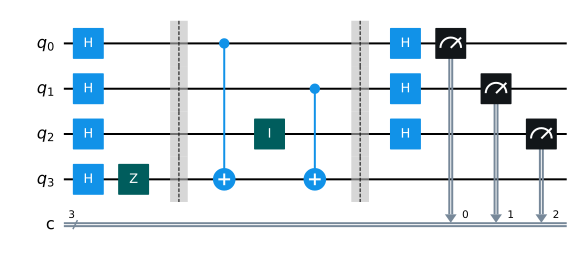

In [4]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

### 3ক. সিমুলেটর দিয়ে পরীক্ষা<a id="simulation"></a>

আমরা উপরের সার্কিটটি সিমুলেটরে চালাতে পারি। 

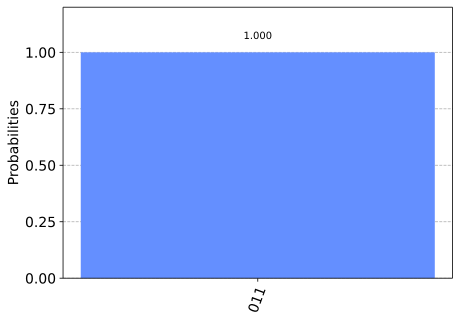

In [5]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

আমরা দেখতে পাচ্ছি যে পরিমাপের ফলাফল হল লুকানো স্ট্রিং `011` । 

### 3 খ. বাস্তব ডিভাইসের সাথে পরীক্ষা<a id="device"></a>

আমরা নিচের মত বাস্তব ডিভাইসে সার্কিট চালাতে পারি।

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


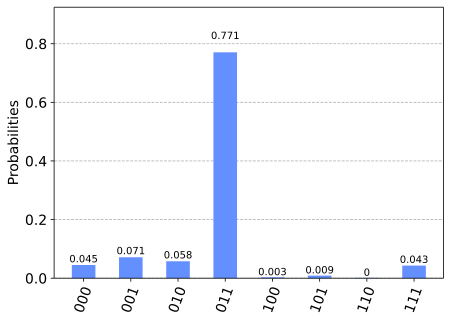

In [8]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

আমরা দেখতে পাচ্ছি, বেশিরভাগ ফলাফল `011` । অন্যান্য ফলাফলগুলি কোয়ান্টাম গণনার ত্রুটির কারণে। 

## 4. অনুশীলন<a id="problems"></a>

1. বার্নস্টাইন-ভাজিরানি অ্যালগরিদম বিভিন্ন ওরাকলের উপর কাজ করে দেখতে নীচের উইজেটটি ব্যবহার করুন:

In [9]:
from qiskit_textbook.widgets import bv_widget
bv_widget(3, "011", hide_oracle=False)

HTMLMath(value='$$ |000\\rangle = |000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01\x08\x08\x06\x00\x00\x00\x17\xd9\…

1. বার্নস্টাইন-ভাজিরানির উপরোক্ত [প্রয়োগটি](#implementation) একটি গোপন বিট স্ট্রিং $s = 011$ এর জন্য। একটি গোপন স্ট্রিং $s = 1011$ এর জন্য বাস্তবায়ন পরিবর্তন করুন। ফলাফল আপনি কি আশা করা হয়? ব্যাখ্যা করা.
2. বার্নস্টাইন-ভাজিরানির উপরোক্ত [প্রয়োগটি](#implementation) একটি গোপন বিট স্ট্রিং $s = 011$ এর জন্য। একটি গোপন স্ট্রিং $s = 11101101$ এর জন্য বাস্তবায়ন পরিবর্তন করুন। ফলাফল আপনি কি আশা করা হয়? ব্যাখ্যা করা.

## 5. References <a id="references"></a>

1. Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, [doi:10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).
2. Jiangfeng Du, Mingjun Shi, Jihui Wu, Xianyi Zhou, Yangmei Fan, BangJiao Ye, Rongdian Han (2001) "Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer", Phys. Rev. A 64, 042306, [10.1103/PhysRevA.64.042306](https://doi.org/10.1103/PhysRevA.64.042306), [arXiv:quant-ph/0012114](https://arxiv.org/abs/quant-ph/0012114). 

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
